In [1]:
import matplotlib.pyplot as plt
import photutils
import pandas as pd
from astropy.visualization import astropy_mpl_style
from astropy.visualization import simple_norm
# plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import glob
fpath = '/Users/Thomas/OneDrive/Desktop/2022-09-01/'
mist = glob.glob(fpath+'Data2/New_FITS_Headers/'+'*.fits')

image_file = get_pkg_data_filename(mist[2])
fits.info(image_file)
print(image_file)



# observatory at 'H81'

Filename: \Users\Thomas\OneDrive\Desktop\2022-09-01\Data2\New_FITS_Headers\WCS CCD Image 238.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     746   (2048, 512)   int16 (rescales to uint16)   
\Users\Thomas\OneDrive\Desktop\2022-09-01\Data2\New_FITS_Headers\WCS CCD Image 238.fits


'H81'

In [37]:
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from photutils.aperture import SkyCircularAperture
import numpy as np
# from photutils.datasets import load_spitzer_image, load_spitzer_catalog
# hdu = load_spitzer_image()  
hdul = fits.open(image_file)
hdu = hdul[0]
image_data = fits.getdata(image_file, ext=0)
# data = u.Quantity(hdu.data, unit=hdu.header['BUNIT'])  
data = image_data


wcs = WCS(hdu.header)  
# catalog = load_spitzer_catalog() 

In [15]:
hdul[0].header['JD']

2459824.5522569446

In [40]:
from astroquery.jplhorizons import Horizons

Flux = []
Flux_ref = []
Times= []



biasimages = glob.glob(fpath+'bias/*bias.fit')
flatimages = glob.glob(fpath+'flat/*flat.fit')
biaslists = []
flatlists = []
for i in biasimages:
    biaslists.append(fits.open(i))
for i in flatimages:
    flatlists.append(fits.open(i))

biasaverage = np.zeros((512, 2048))
for k in biaslists:
    biasaverage += k[0].data
biasaverage = biasaverage / len(biaslists)

flataverage = np.zeros((512, 2048))
for k in flatlists:
    flataverage += k[0].data
flataverage = flataverage / len(flatlists)

flatcorrect = np.zeros((512, 2048))
for j in flatlists:
    flatcorrect += (j[0].data - biasaverage)
flatcorrect = flatcorrect / flataverage



for i in range(len(mist)):
    image_file = get_pkg_data_filename(mist[i])
    hdul = fits.open(image_file)
    hdu = hdul[0]
    data = fits.getdata(image_file, ext=0)
    wcs = WCS(hdu.header)
    
    Times.append(hdul[0].header['JD'])
    obj = Horizons(id='1941 SJ', location='H81', epochs=hdul[0].header['JD'])
    RA = obj.ephemerides()['RA'][0]
    DEC = obj.ephemerides()['DEC'][0]
    
    c1 = SkyCoord('20:57:50.3355908660 -00:43:26.190526080', unit=(u.hourangle, u.deg))
    c2 = SkyCoord('20:57:24.3835886736 -00:43:34.439038464', unit=(u.hourangle, u.deg))
#     print(c1.ra.degree)
#     print(c2.ra.degree)
    RA_ref = [c1.ra.degree, c2.ra.degree]
    DEC_ref = [c1.dec.degree, c2.dec.degree]
    
    positions = SkyCoord(RA, DEC, frame='icrs', unit = 'deg')
    ref_stars = SkyCoord(RA_ref, DEC_ref, frame='icrs', unit = 'deg')
    aperture = SkyCircularAperture(positions, r=4.8 * u.arcsec)  
    aperture_ref = SkyCircularAperture(ref_stars, r=4.8 * u.arcsec)  
    print(aperture)
    phot_table = aperture_photometry(data/flatcorrect, aperture, wcs=wcs)  
    phot_table_ref = aperture_photometry(data/flatcorrect, aperture_ref, wcs=wcs)
    
    Flux.append(phot_table['aperture_sum'].value)
    Flux_ref.append(phot_table_ref['aperture_sum'].value)
    
    
# print(obj.ephemerides()['RA'])
# print(obj.ephemerides()['DEC'][0])

Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39829, -0.6908)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39823, -0.69078)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39817, -0.69076)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39812, -0.69074)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39806, -0.69072)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39801, -0.69071)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39795, -0.69069)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39789, -0.69067)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39784, -0.69065)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39778, -0.69063)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39773, -0.69061)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39767, -0.6906)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39761, -0.69058)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39756, -0.69056)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3975, -0.69054)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39744, -0.69052)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39739, -0.69051)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39733, -0.69049)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39728, -0.69047)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39722, -0.69045)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39716, -0.69043)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39711, -0.69041)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39705, -0.6904)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.397, -0.69038)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39694, -0.69036)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39688, -0.69034)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39683, -0.69032)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39677, -0.69031)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39672, -0.69029)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39666, -0.69027)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3966, -0.69025)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39655, -0.69023)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39649, -0.69021)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39643, -0.6902)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39638, -0.69018)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39632, -0.69016)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39626, -0.69014)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39621, -0.69012)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39615, -0.69011)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3961, -0.69009)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39604, -0.69007)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39598, -0.69005)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39593, -0.69003)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39587, -0.69001)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39582, -0.69)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39576, -0.68998)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3957, -0.68996)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39565, -0.68994)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39559, -0.68992)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39553, -0.6899)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39548, -0.68989)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39542, -0.68987)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39536, -0.68985)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39531, -0.68983)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39525, -0.68981)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3952, -0.6898)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39514, -0.68978)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39508, -0.68976)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39503, -0.68974)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39497, -0.68972)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39491, -0.6897)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39486, -0.68969)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3948, -0.68967)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39474, -0.68965)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39469, -0.68963)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39463, -0.68961)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39458, -0.6896)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39452, -0.68958)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39446, -0.68956)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39441, -0.68954)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39435, -0.68952)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39429, -0.6895)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39424, -0.68949)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39418, -0.68947)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39412, -0.68945)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39407, -0.68943)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39401, -0.68941)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39395, -0.6894)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3939, -0.68938)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39384, -0.68936)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39378, -0.68934)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39373, -0.68932)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39367, -0.6893)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39362, -0.68929)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39356, -0.68927)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3935, -0.68925)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39345, -0.68923)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39339, -0.68921)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39333, -0.6892)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39328, -0.68918)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39322, -0.68916)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39316, -0.68914)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39311, -0.68912)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39305, -0.6891)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39299, -0.68909)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39294, -0.68907)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39288, -0.68905)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39282, -0.68903)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39277, -0.68901)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39271, -0.689)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39265, -0.68898)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3926, -0.68896)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39254, -0.68894)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39248, -0.68892)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39243, -0.6889)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39237, -0.68889)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39231, -0.68887)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39226, -0.68885)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3922, -0.68883)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39215, -0.68881)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39209, -0.6888)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39203, -0.68878)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39197, -0.68876)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39192, -0.68874)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39186, -0.68872)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39181, -0.6887)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39175, -0.68869)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39169, -0.68867)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39164, -0.68865)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39158, -0.68863)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39152, -0.68861)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39147, -0.6886)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39141, -0.68858)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39135, -0.68856)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3913, -0.68854)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39124, -0.68852)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39118, -0.6885)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39113, -0.68849)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39107, -0.68847)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.39101, -0.68845)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38978, -0.68806)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38972, -0.68804)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38967, -0.68802)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38961, -0.688)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38955, -0.68798)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3895, -0.68796)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38944, -0.68795)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38938, -0.68793)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38933, -0.68791)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38927, -0.68789)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38922, -0.68787)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38916, -0.68785)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3891, -0.68784)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38905, -0.68782)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38899, -0.6878)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38893, -0.68778)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38888, -0.68776)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38882, -0.68775)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38876, -0.68773)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38871, -0.68771)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38865, -0.68769)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38859, -0.68767)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38854, -0.68766)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38848, -0.68764)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38842, -0.68762)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38837, -0.6876)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38831, -0.68758)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38826, -0.68757)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3882, -0.68755)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38814, -0.68753)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38808, -0.68751)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38803, -0.68749)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38797, -0.68747)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38792, -0.68746)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38786, -0.68744)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3878, -0.68742)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38775, -0.6874)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38769, -0.68738)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38763, -0.68737)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38758, -0.68735)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38752, -0.68733)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38746, -0.68731)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38741, -0.68729)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38735, -0.68728)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3873, -0.68726)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38724, -0.68724)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38718, -0.68722)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38712, -0.6872)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38707, -0.68718)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38701, -0.68717)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38696, -0.68715)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3869, -0.68713)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38684, -0.68711)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38679, -0.68709)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38673, -0.68708)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38667, -0.68706)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38662, -0.68704)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38623, -0.68692)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38617, -0.6869)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38612, -0.68688)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38606, -0.68686)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.386, -0.68684)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38595, -0.68682)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38589, -0.68681)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38584, -0.68679)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38578, -0.68677)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38572, -0.68675)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38567, -0.68673)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38561, -0.68672)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38555, -0.6867)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3855, -0.68668)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38544, -0.68666)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38538, -0.68664)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38533, -0.68663)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38527, -0.68661)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38521, -0.68659)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38516, -0.68657)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.3851, -0.68655)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38505, -0.68653)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38499, -0.68652)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38493, -0.6865)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38488, -0.68648)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38482, -0.68646)>
r: 4.8 arcsec


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38476, -0.68644)>
r: 4.8 arcsec
Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    (314.38471, -0.68643)>
r: 4.8 arcsec


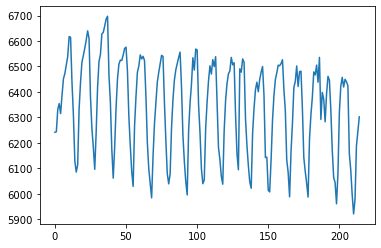

In [39]:
import matplotlib.pyplot as plt
plt.plot(Flux)

In [31]:
Flux_ref

[array([267209.22518806, 235012.88630303]),
 array([270286.80666314, 239224.92020211]),
 array([271775.54722603, 234625.46357236]),
 array([269775.211706 , 232444.9350433]),
 array([277729.48303359, 226214.02673115]),
 array([275005.06013266, 219487.64120074]),
 array([275357.78467259, 213100.66130811]),
 array([280184.08510196, 212096.49130179]),
 array([284576.43647326, 201211.62647122]),
 array([285967.64575171, 195169.45815374]),
 array([283954.26988702, 181114.75606919]),
 array([282638.33317158, 166963.63027691]),
 array([278801.36504224, 151313.05053387]),
 array([273842.26210177, 148010.55488132]),
 array([270168.48853834, 134737.62204888]),
 array([274787.49971686, 113920.09245672]),
 array([276414.57012336, 134963.76206277]),
 array([277369.49038663, 134297.31524044]),
 array([278387.00355928, 116465.20975915]),
 array([280847.45314881, 112272.34628645]),
 array([280575.36720022, 105156.44301485]),
 array([281534.80295509, 122906.50521849]),
 array([283537.03961435, 103490.42

In [4]:

# RA:
# 20h, 57m, 50.3355908660s
# 20h 57m 24.3835886736s


# DEC:
# -004326.190526080
# -004334.439038464
#  '20:57:24.3835886736 -00:43:34.439038464'

c1 = SkyCoord('20:57:50.3355908660 -00:43:26.190526080', unit=(u.hourangle, u.deg))
c2 = SkyCoord('20:57:24.3835886736 -00:43:34.439038464', unit=(u.hourangle, u.deg))
print(c1.ra.degree)
print(c2.ra.degree)
RA_ref = [c1.ra.degree, c2.ra.degree]
DEC_ref = [c1.dec.degree, c2.dec.degree]

314.45973162860827
314.35159828613996


In [5]:
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level fram
positions = SkyCoord(RA, DEC, frame='icrs', unit = 'deg')
ref_stars = SkyCoord(RA_ref, DEC_ref, frame='icrs', unit = 'deg')

# ref_stars = SkyCoord(RA, DEC, frame='icrs')
aperture = SkyCircularAperture(positions, r=4.8 * u.arcsec)  
aperture_ref = SkyCircularAperture(ref_stars, r=4.8 * u.arcsec)  

AttributeError: 'SkyCircularAperture' object has no attribute 'plot'

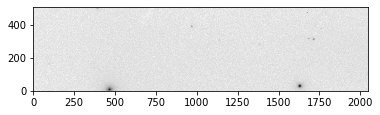

In [56]:
norm = simple_norm(image_data, 'log')

plt.imshow(image_data, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
aperture.plot(color='blue', lw=1.5, alpha=0.5)

In [10]:
from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(data, aperture, wcs=wcs)  
phot_table_ref = aperture_photometry(data, aperture_ref, wcs=wcs)  

print(phot_table)

print(phot_table_ref)

 id      xcenter           ycenter          sky_center        aperture_sum   
           pix               pix             deg,deg                         
--- ----------------- ----------------- ------------------ ------------------
  1 967.7926484359531 394.5696694921405 314.39817,-0.69076 108524.19637146688
 id      xcenter       ...    aperture_sum   
           pix         ...                   
--- ------------------ ... ------------------
  1 1630.4937832996218 ... 271775.54722602584
  2  465.5623929290529 ...  234625.4635723625


In [13]:


phot_table['aperture_sum'].value

array([108524.19637147])

In [58]:
import astropy.units as u
factor = (1.2 * u.arcsec) ** 2 / u.pixel
fluxes_catalog = catalog['f4_5']  
converted_aperture_sum = (phot_table['aperture_sum'] *
                          factor).to(u.mJy / u.pixel)  

NameError: name 'catalog' is not defined

Text(0, 0.5, 'Aperture photometry fluxes')

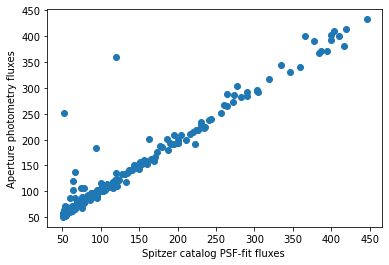

In [18]:
import matplotlib.pyplot as plt
plt.scatter(fluxes_catalog, converted_aperture_sum.value)
plt.xlabel('Spitzer catalog PSF-fit fluxes ')
plt.ylabel('Aperture photometry fluxes')

In [19]:
hdu

In [20]:
fits.getdata(image_file)

array([[160, 157, 159, ..., 159, 158, 158],
       [160, 160, 158, ..., 161, 160, 159],
       [160, 156, 159, ..., 163, 163, 160],
       ...,
       [156, 156, 157, ..., 160, 157, 158],
       [159, 156, 159, ..., 160, 157, 156],
       [158, 159, 157, ..., 159, 160, 156]], dtype=uint16)

In [24]:
hdul[0]